In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saman8899
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 653M/653M [18:40<00:00, 611kB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np


In [5]:
data1 = pd.read_csv(data_filename)
data = data1.sample(n = 10000)
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1967261,A-1977124,Source2,3,2019-07-19 19:16:12,2019-07-19 20:15:38,45.069878,-93.296524,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3332106,A-3341989,Source2,2,2017-09-29 17:09:45,2017-09-29 17:54:33,35.020111,-82.413017,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
5713635,A-5756580,Source1,2,2021-09-10 14:37:15.000000000,2021-09-10 18:54:55.000000000,29.993004,-90.048356,30.004602,-90.026881,1.514,...,False,False,False,False,False,False,Day,Day,Day,Day
7601826,A-7651194,Source1,2,2017-12-21 17:50:30,2017-12-21 23:50:30,43.018738,-83.734778,43.018738,-83.734778,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
2936300,A-2946179,Source2,3,2018-03-15 08:51:24,2018-03-15 09:20:25,42.664047,-71.194122,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317723,A-4350348,Source1,4,2022-10-31 20:00:01.000000000,2022-10-31 22:12:55.000000000,43.157290,-77.689036,43.163940,-77.682706,0.559,...,False,False,False,False,False,False,Night,Night,Night,Night
2432096,A-2441967,Source2,3,2018-11-08 09:23:14,2018-11-08 10:08:00,39.052727,-84.623772,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3073504,A-3083383,Source2,2,2018-01-24 14:56:01,2018-01-24 15:25:46,35.219398,-80.723053,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
6765465,A-6814499,Source1,2,2020-11-27 23:20:30,2020-11-28 02:53:00,32.772803,-117.128922,32.767077,-117.147637,1.157,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1967261 to 6338796
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                5573 non-null   float64
 8   End_Lng                5573 non-null   float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 9987 non-null   object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15 

In [7]:
data.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  4427
End_Lng                  4427
Distance(mi)                0
Description                 0
Street                     13
City                        0
County                      0
State                       0
Zipcode                     3
Country                     0
Timezone                   13
Airport_Code               26
Weather_Timestamp         146
Temperature(F)            205
Wind_Chill(F)            2546
Humidity(%)               221
Pressure(in)              173
Visibility(mi)            220
Wind_Direction            215
Wind_Speed(mph)           704
Precipitation(in)        2816
Weather_Condition         205
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [8]:
columns = ['End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 
    'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

data_cleaned = data.dropna(subset = columns)
data_cleaned



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6833618,A-6882803,Source1,2,2020-09-14 17:44:30.000000000,2020-09-15 02:40:16.000000000,40.841282,-73.945616,40.843161,-73.944674,0.139,...,False,False,False,False,False,False,Day,Day,Day,Day
6087426,A-6132610,Source1,2,2021-04-27 05:05:30,2021-04-27 15:41:25,25.769711,-80.335312,25.770904,-80.336395,0.106,...,False,False,False,False,False,False,Night,Night,Night,Night
4036895,A-4067237,Source1,2,2022-09-15 05:35:30.000000000,2022-09-15 09:20:30.000000000,40.675708,-73.733000,40.665902,-73.832905,5.279,...,False,False,False,False,False,False,Night,Night,Day,Day
7715367,A-7764735,Source1,2,2019-07-26 15:14:44,2019-07-26 15:43:03,34.076700,-117.544650,34.081840,-117.544620,0.355,...,False,False,False,False,False,False,Day,Day,Day,Day
5655330,A-5697917,Source1,2,2021-06-11 00:18:09,2021-06-11 02:26:53,41.101881,-73.434666,41.088951,-73.455656,1.412,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663966,A-6712667,Source1,2,2020-09-25 18:59:00,2020-09-26 02:51:43,41.699509,-87.786015,41.755970,-87.877289,6.113,...,False,False,False,False,False,False,Night,Day,Day,Day
5115640,A-5154445,Source1,2,2022-07-12 20:28:00.000000000,2022-07-12 22:37:29.000000000,40.713764,-73.339050,40.713886,-73.335488,0.187,...,False,False,False,False,False,False,Night,Day,Day,Day
4317723,A-4350348,Source1,4,2022-10-31 20:00:01.000000000,2022-10-31 22:12:55.000000000,43.157290,-77.689036,43.163940,-77.682706,0.559,...,False,False,False,False,False,False,Night,Night,Night,Night
6765465,A-6814499,Source1,2,2020-11-27 23:20:30,2020-11-28 02:53:00,32.772803,-117.128922,32.767077,-117.147637,1.157,...,False,False,False,False,False,False,Night,Night,Night,Night


In [9]:
df1 = data.dropna()
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6833618,A-6882803,Source1,2,2020-09-14 17:44:30.000000000,2020-09-15 02:40:16.000000000,40.841282,-73.945616,40.843161,-73.944674,0.139,...,False,False,False,False,False,False,Day,Day,Day,Day
6087426,A-6132610,Source1,2,2021-04-27 05:05:30,2021-04-27 15:41:25,25.769711,-80.335312,25.770904,-80.336395,0.106,...,False,False,False,False,False,False,Night,Night,Night,Night
4036895,A-4067237,Source1,2,2022-09-15 05:35:30.000000000,2022-09-15 09:20:30.000000000,40.675708,-73.733000,40.665902,-73.832905,5.279,...,False,False,False,False,False,False,Night,Night,Day,Day
7715367,A-7764735,Source1,2,2019-07-26 15:14:44,2019-07-26 15:43:03,34.076700,-117.544650,34.081840,-117.544620,0.355,...,False,False,False,False,False,False,Day,Day,Day,Day
5655330,A-5697917,Source1,2,2021-06-11 00:18:09,2021-06-11 02:26:53,41.101881,-73.434666,41.088951,-73.455656,1.412,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663966,A-6712667,Source1,2,2020-09-25 18:59:00,2020-09-26 02:51:43,41.699509,-87.786015,41.755970,-87.877289,6.113,...,False,False,False,False,False,False,Night,Day,Day,Day
5115640,A-5154445,Source1,2,2022-07-12 20:28:00.000000000,2022-07-12 22:37:29.000000000,40.713764,-73.339050,40.713886,-73.335488,0.187,...,False,False,False,False,False,False,Night,Day,Day,Day
4317723,A-4350348,Source1,4,2022-10-31 20:00:01.000000000,2022-10-31 22:12:55.000000000,43.157290,-77.689036,43.163940,-77.682706,0.559,...,False,False,False,False,False,False,Night,Night,Night,Night
6765465,A-6814499,Source1,2,2020-11-27 23:20:30,2020-11-28 02:53:00,32.772803,-117.128922,32.767077,-117.147637,1.157,...,False,False,False,False,False,False,Night,Night,Night,Night


In [10]:
df1.shape

(4617, 46)

In [11]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,2.077540,36.207799,-95.498618,36.207727,-95.499090,0.817799,60.813602,59.430344,64.186918,29.339699,9.016639,7.430691,0.005276
std,0.389485,5.439432,18.053276,5.439451,18.053098,1.462560,19.655856,22.024060,22.629665,1.130407,2.477637,5.756665,0.040342
min,1.000000,24.662795,-124.220236,24.663095,-124.220886,0.000000,-17.000000,-47.000000,5.000000,20.430000,0.000000,0.000000,0.000000
25%,2.000000,33.182426,-117.603530,33.179264,-117.603530,0.070000,48.000000,46.000000,48.000000,29.170000,10.000000,3.000000,0.000000
50%,2.000000,36.164828,-87.920550,36.157348,-87.925260,0.266000,63.000000,63.000000,66.000000,29.710000,10.000000,7.000000,0.000000
75%,2.000000,40.362922,-80.245889,40.355729,-80.246090,0.932000,76.000000,76.000000,84.000000,29.960000,10.000000,10.000000,0.000000
max,4.000000,48.539019,-69.944528,48.535802,-69.946807,23.210000,110.000000,110.000000,100.000000,30.670000,50.000000,131.000000,1.290000


In [12]:
df1.duplicated().sum()

0

In [13]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
cities = df1['City'].unique()
cities

array(['New York', 'Miami', 'Rosedale', ..., 'Fairfax Station', 'Daphne',
       'Chicago Ridge'], dtype=object)

In [15]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Miami             187
Los Angeles       103
Orlando            92
Dallas             65
Houston            60
                 ... 
Biggs               1
Cana                1
Kings Mountain      1
Berwyn              1
Chicago Ridge       1
Name: count, Length: 1676, dtype: int64

In [16]:
accidents_by_cities[:10]

City
Miami          187
Los Angeles    103
Orlando         92
Dallas          65
Houston         60
Charlotte       51
San Diego       47
Minneapolis     40
Sacramento      39
Austin          36
Name: count, dtype: int64

In [17]:
# Categorical columns
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Condition', 'Sunrise_Sunset', 
                       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [18]:
# Numerical columns (excluding 'Weather_Timestamp' as it is not numeric)
numerical_columns = ['End_Lat', 'End_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                     'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


In [19]:

# Impute missing values: Use most frequent for categorical and median for numerical
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

In [20]:
# Strip spaces from column names (if any)
df1.columns = df1.columns.str.strip()

# Check for missing columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
missing_numerical_columns = [col for col in numerical_columns if col not in df1.columns]

if missing_categorical_columns or missing_numerical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
    print(f"Missing numerical columns: {missing_numerical_columns}")
else:
    # Impute missing values
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    numerical_imputer = SimpleImputer(strategy='median')

    # Apply imputation to categorical columns
    df1[categorical_columns] = categorical_imputer.fit_transform(df1[categorical_columns])

    # Apply imputation to numerical columns
    df1[numerical_columns] = numerical_imputer.fit_transform(df1[numerical_columns])

    print("Imputation completed successfully.")

Imputation completed successfully.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17756\2571618607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categorical_columns] = categorical_imputer.fit_transform(df1[categorical_columns])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17756\2571618607.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numerical_columns] = numerical_imputer.fit_transform(df1[numerical_columns])


In [21]:
# Remove duplicate rows
df1 = df1.drop_duplicates()

In [22]:
df1 = df1[(df1['Temperature(F)'] < 150) & (df1['Temperature(F)'] > -100)]
# handling outliers

In [23]:
#Normalize numerical columns (Min-Max Scaling)
scaler = MinMaxScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [24]:
# Strip spaces from column names (if any) to prevent mismatches
df1.columns = df1.columns.str.strip()

# Check the column names after imputation
print("Columns in df1:", df1.columns)

Columns in df1: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [25]:
# Check for missing categorical columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
else:
    print("All categorical columns are present.")


All categorical columns are present.


In [26]:
# One-hot encoding for categorical variables (to handle categorical data in machine learning models)
if not missing_categorical_columns:  # Apply encoding if no columns are missing
    df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)
    print("One-hot encoding applied successfully.")
else:
    print("Cannot apply one-hot encoding due to missing categorical columns.")


One-hot encoding applied successfully.


In [27]:
# PCA reduces dimensionality while retaining most of the variance
# The number of components can be set to retain a percentage of variance (e.g., 95%)
# Select only the numerical columns for PCA
numerical_columns = df1.select_dtypes(include=['number']).columns
df_numerical = df1[numerical_columns]

# Apply PCA with 95% variance explained
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_numerical)

# Create a DataFrame from the PCA results
df_pca = pd.DataFrame(df_pca)

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.91243092 0.08097211]


In [28]:

d_road = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df1[d_road].sum()


Amenity             50
Bump                 2
Crossing           422
Give_Way            18
Junction           378
No_Exit              9
Railway             45
Roundabout           0
Station            134
Stop               102
Traffic_Calming      2
Traffic_Signal     387
Turning_Loop         0
dtype: int64

<Figure size 1200x800 with 0 Axes>

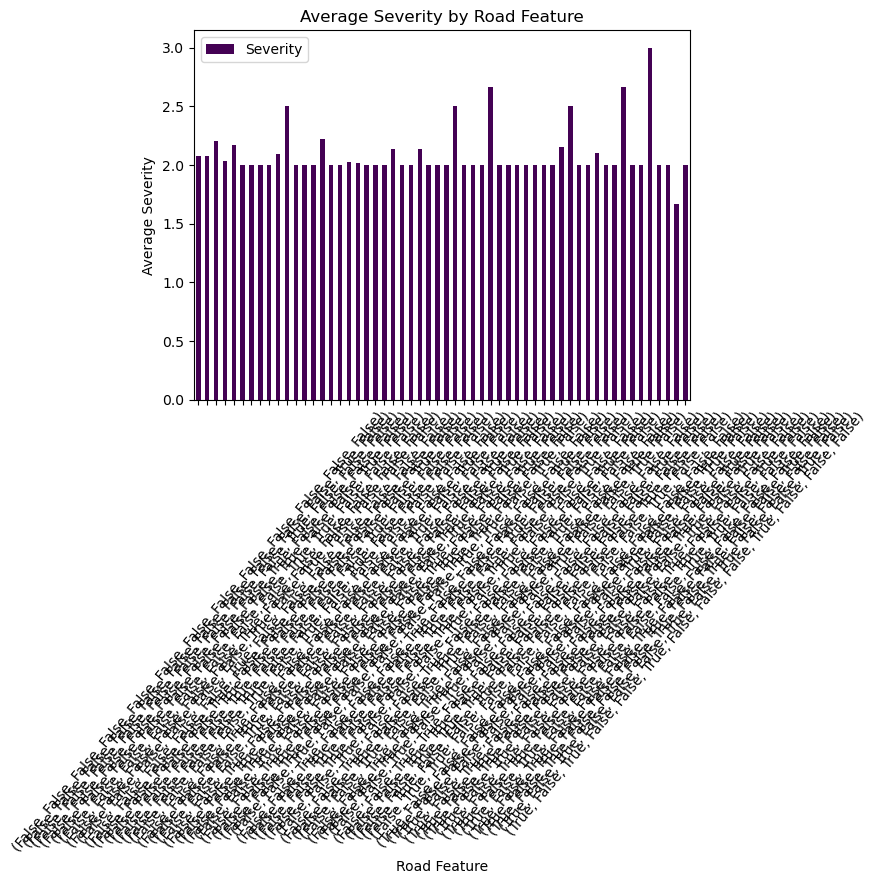

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
severity_by_road = df1.groupby(d_road).agg({'Severity': 'mean'})
severity_by_road
plt.figure(figsize=(12, 8))
severity_by_road.plot(kind='bar', colormap ='viridis')
plt.title('Average Severity by Road Feature')
plt.xlabel('Road Feature')
plt.ylabel('Average Severity')
plt.xticks(rotation= 50)
plt.show()

In [30]:

df1['Start_Time'].dtypes
df1['End_Time'].dtypes


dtype('O')

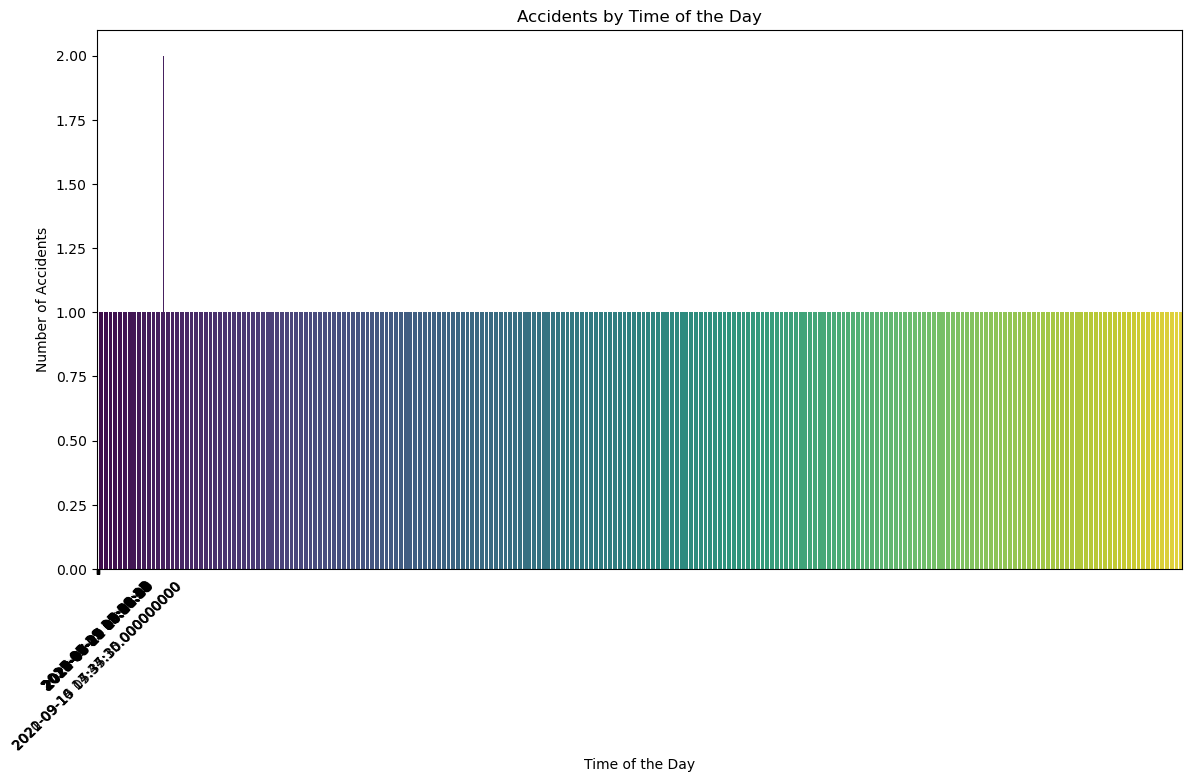

In [31]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Start_Time', palette='viridis')
plt.title('Accidents by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24), rotation=45)
plt.show()





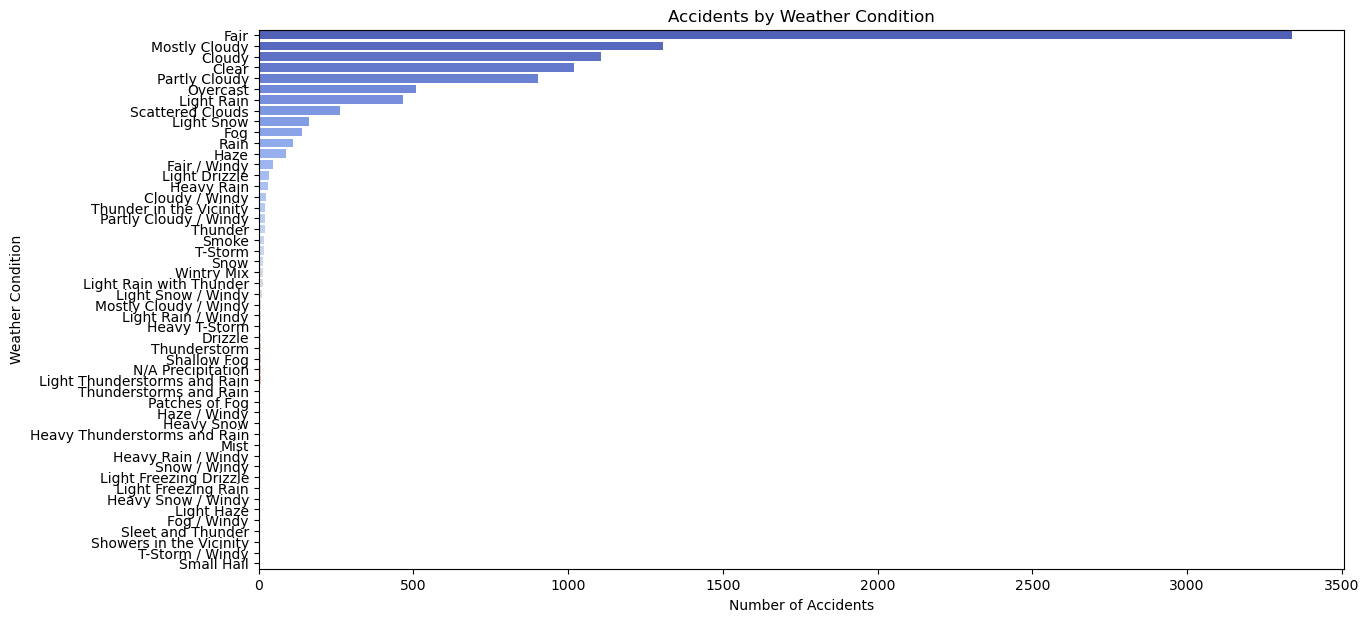

In [32]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='Weather_Condition', palette='coolwarm', order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()



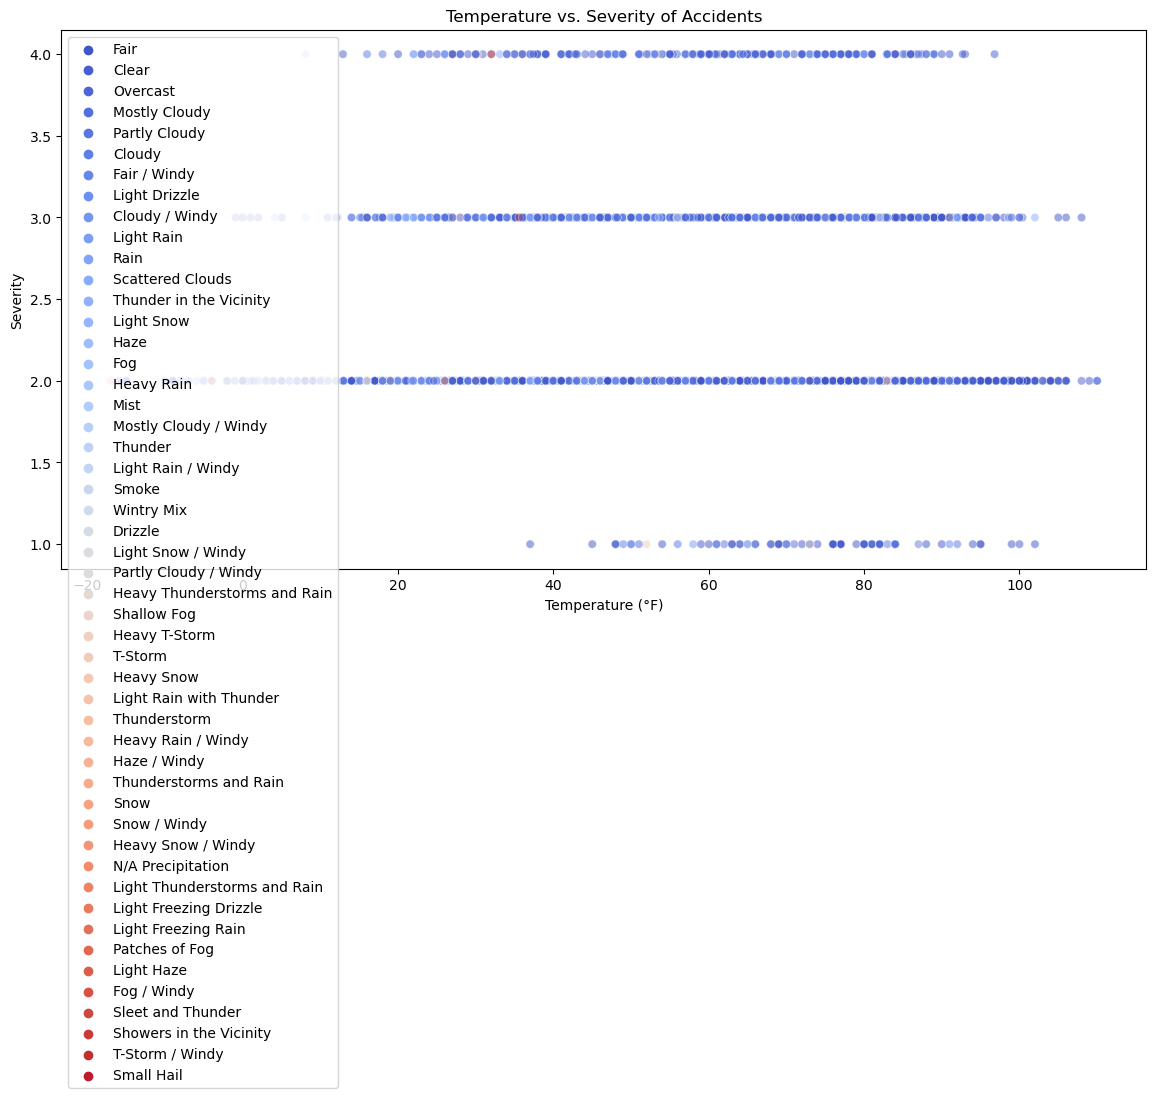

In [33]:


plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Temperature(F)', y='Severity', alpha=0.5, palette='coolwarm', hue='Weather_Condition')
plt.title('Temperature vs. Severity of Accidents')
plt.xlabel('Temperature (°F)')
plt.ylabel('Severity')
plt.legend(loc='best')
plt.show()

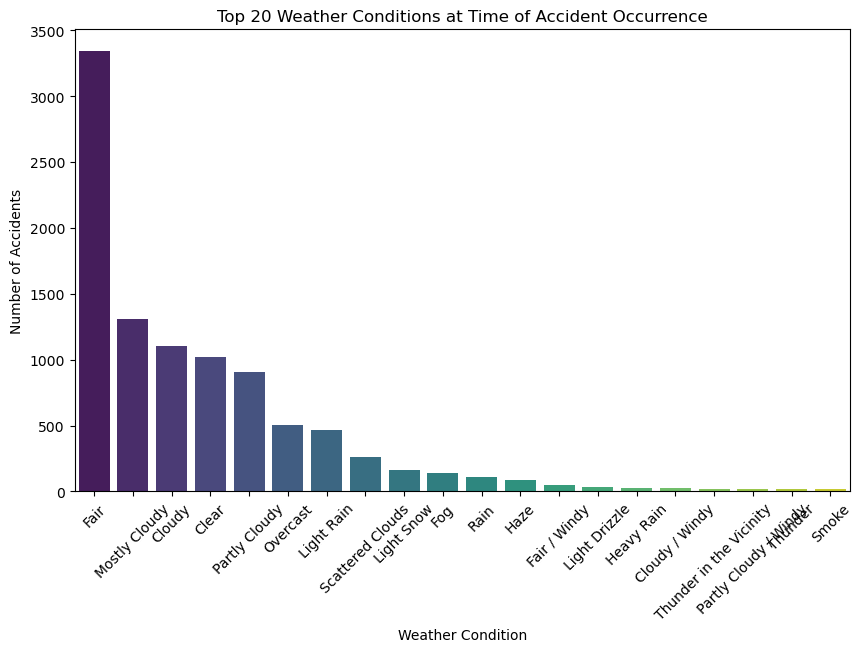

In [34]:

weather_counts = data['Weather_Condition'].value_counts()
top_weather_conditions = weather_counts.sort_values(ascending=False)[:20]


plt.figure(figsize=(10, 6))
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette='viridis')

plt.title('Top 20 Weather Conditions at Time of Accident Occurrence')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='Severity', ylabel='Start_Lat'>

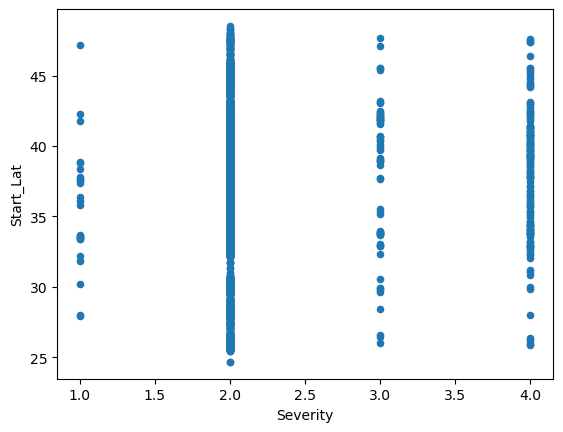

In [35]:
df1.plot(kind='scatter', y='Start_Lat', x='Severity')

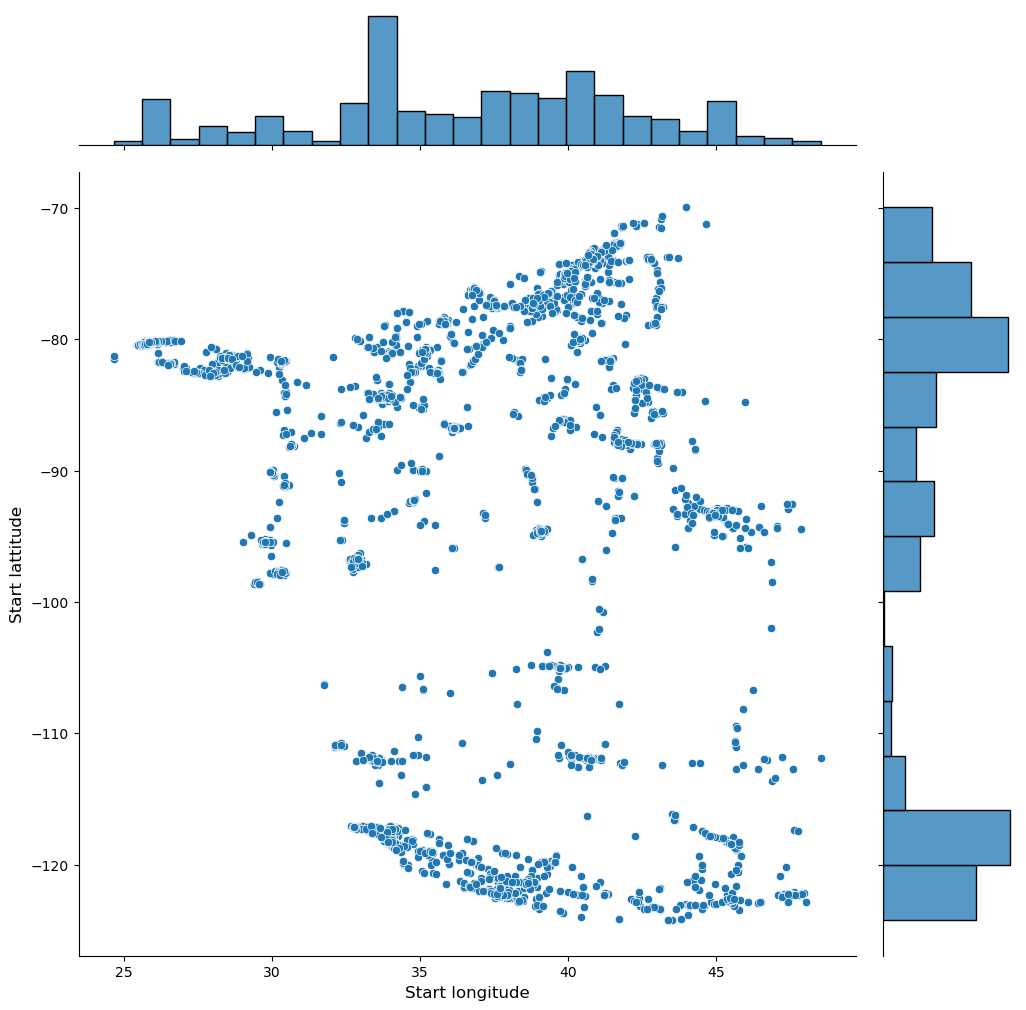

In [55]:
sns.jointplot(x=df1.Start_Lat.values , y=df1.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start longitude', fontsize=12)
plt.show()

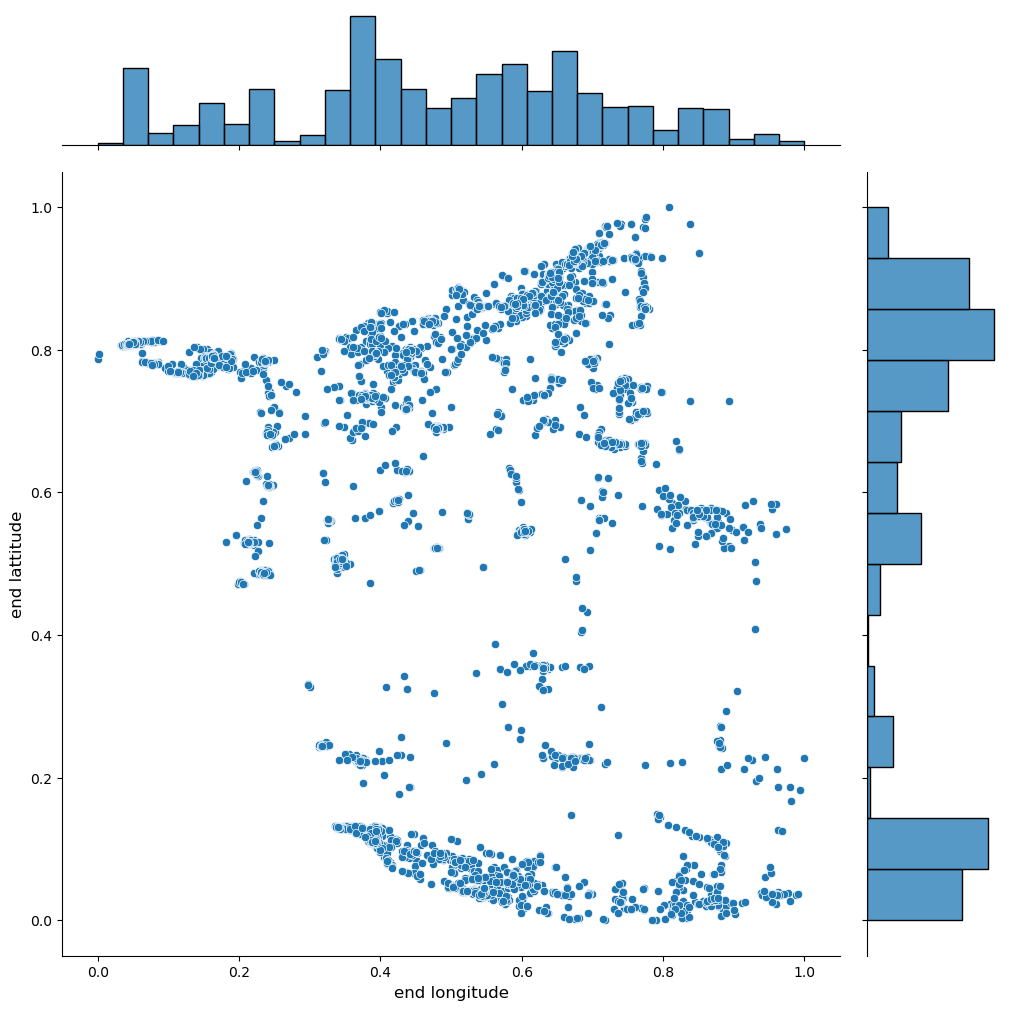

In [37]:
sns.jointplot(x=df1.End_Lat.values , y=df1.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

In [38]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[data['Start_Lat'].mean(), data['Start_Lng'].mean()], zoom_start=12, tiles='Stamen Terrain')


heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)


m.save('accident_heatmap.html')

print(m)


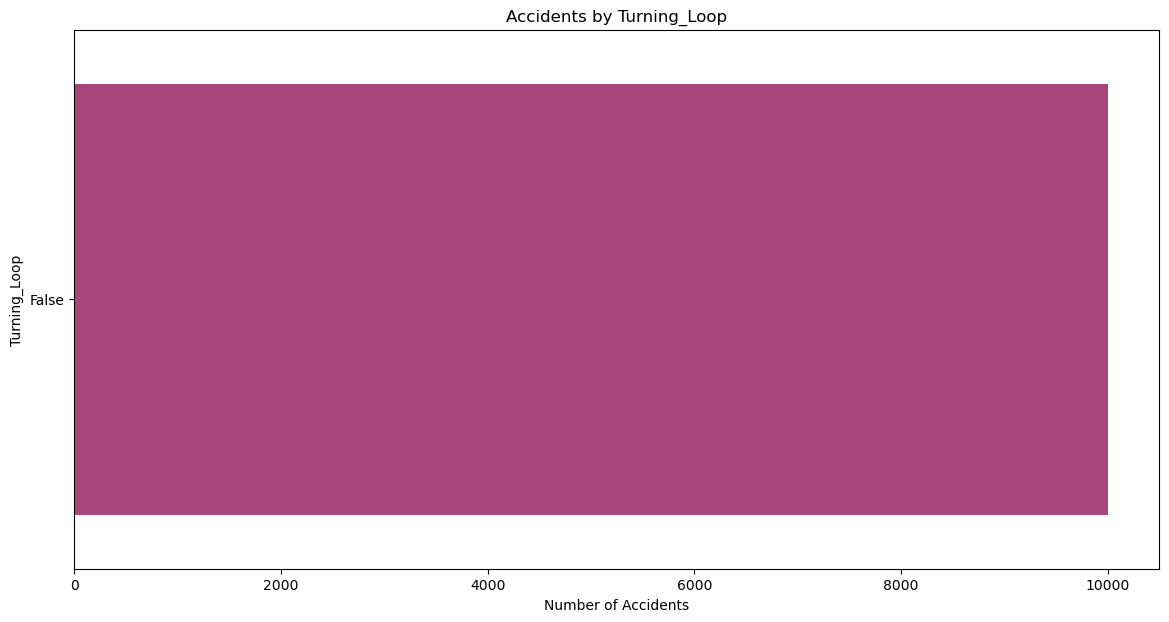

In [39]:
plt.figure(figsize=(14, 7))
sns.countplot(data= data, y='Turning_Loop', palette='magma', order=data['Turning_Loop'].value_counts().index)
plt.title('Accidents by Turning_Loop')
plt.xlabel('Number of Accidents')
plt.ylabel('Turning_Loop')
plt.show()

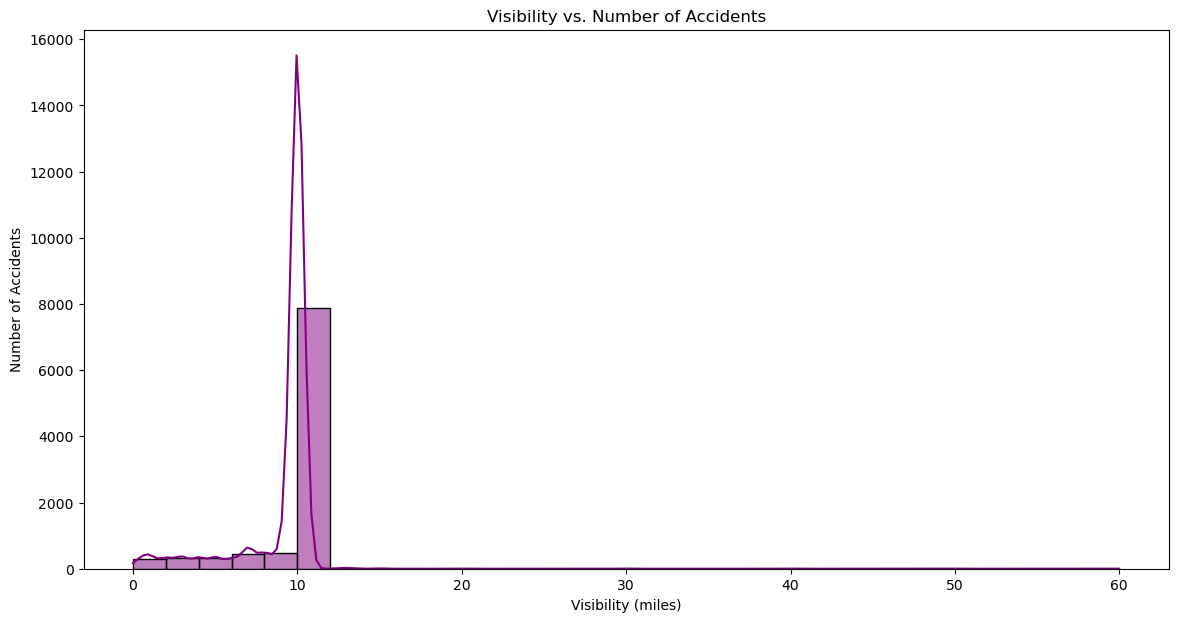

In [40]:
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='Visibility(mi)', bins=30, kde=True, color='purple')
plt.title('Visibility vs. Number of Accidents')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')
plt.show()

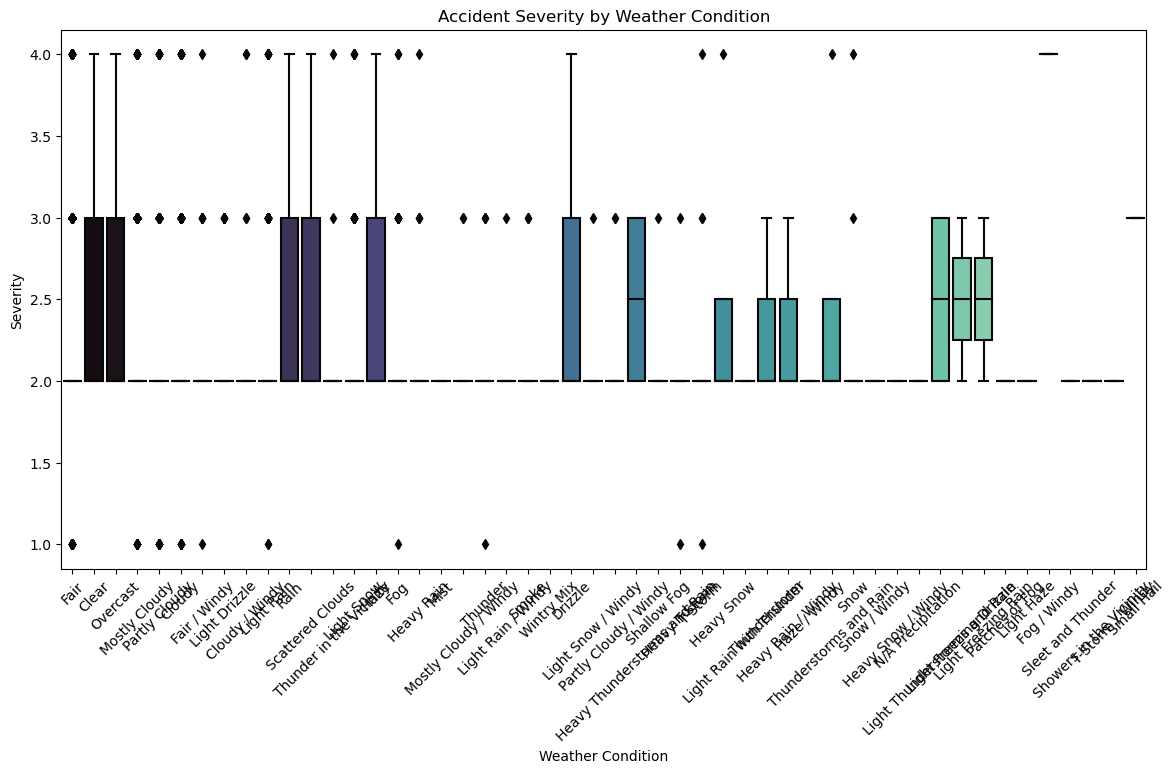

In [41]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Weather_Condition', y='Severity', palette='mako')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Check if 'Weather_Condition' exists and clean column names
df1.columns = df1.columns.str.strip()  # Strip any leading or trailing spaces in column names

# Verify if 'Weather_Condition' exists in the DataFrame
if 'Weather_Condition' in df1.columns:
    # Encode categorical target variable (Weather_Condition) using Label Encoding
    label_encoder = LabelEncoder()
    df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
else:
    print("'Weather_Condition' column is missing or has a different name.")
    # Optionally, list all columns to inspect
    print("Available columns:", df1.columns)

# Apply label encoding for other categorical features if they exist
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code']  # Add more columns if needed
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"'{col}' column is missing or has a different name.")

# Step 3: Check if 'Weather_Condition' column exists before proceeding
if 'Weather_Condition' in df1.columns:
    # Feature Selection and Data Splitting
    X = df1.drop('Weather_Condition', axis=1)  # Features (excluding target variable)
    y = df1['Weather_Condition']  # Target variable (Weather_Condition)

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train a Classifier (Random Forest)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Step 5: Make Predictions and Evaluate the Model
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    print("The 'Weather_Condition' column is not available for feature extraction.")


'Weather_Condition' column is missing or has a different name.
Available columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow / Windy', 'Weather_Condition_T-Storm',
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5432)
'Street' column is missing or has a different name.
'City' column is missing or has a different name.
'Timezone' column is missing or has a different name.
'Airport_Code' column is missing or has a different name.
The 'Weather_Condition' column is not available for feature extraction.


The Random Forest algorithm is used in this code for the purpose of predicting the weather condition (Weather_Condition) based on other features in the dataset. In this context, Random Forest is applied as a classification model to determine which weather condition (e.g., "sunny", "rainy", "cloudy", etc.) corresponds to a given set of features (e.g., street, city, airport code, timezone, etc.).

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       637

    accuracy                           1.00       637
   macro avg       1.00      1.00      1.00       637
weighted avg       1.00      1.00      1.00       637



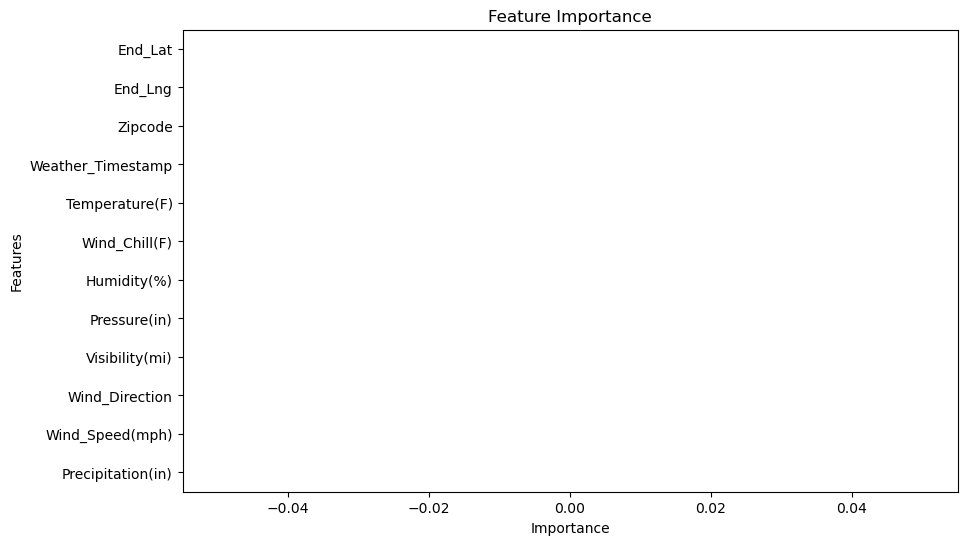

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df1.columns = df1.columns.str.strip()

# Define the feature columns (excluding 'Weather_Condition' and target column)
feature_columns = [
    'End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

# Select target variable
target_variable = 'Temperature(F)'

# Step 1: Clean and encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Only apply encoding if the column exists in the dataset
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 
                       'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

# Encode only the columns that exist in the dataframe
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"Warning: Column '{col}' not found. Skipping encoding for this column.")

# Step 2: Convert 'Zipcode' or any other columns that are treated as strings to numeric (if applicable)
if 'Zipcode' in df1.columns:
    # You could drop it or encode it if necessary
    df1['Zipcode'] = pd.to_numeric(df1['Zipcode'], errors='coerce')  # Coerce errors to NaN

# Step 3: Filter the feature_columns to include only those present in the DataFrame
available_feature_columns = [col for col in feature_columns if col in df1.columns]

# Step 4: Drop rows with missing values in the target or features
df1 = df1.dropna(subset=[target_variable] + available_feature_columns)

X = df1[available_feature_columns]  # Features
y = df1[target_variable]  # Target

# Step 5: Convert the target variable to a classification-friendly format (e.g., discretizing temperature ranges)
y = pd.cut(y, bins=[-float('inf'), 32, 50, 70, 90, float('inf')], labels=["Low", "Cool", "Warm", "Hot", "Very Hot"])

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 10: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance (to understand which features were important in the model)
importances = rf_classifier.feature_importances_
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The main goal of this model is to predict temperature categories using a Random Forest Classifier. The key features in the model are environmental data points like latitude, longitude, weather conditions, and other attributes that influence temperature. By discretizing the target variable (temperature) into categories, the problem becomes a classification task, where the model is trained to predict which temperature category the data falls into.

In [44]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Check the available columns
print("Available columns:", df1.columns)


Available columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow / Windy', 'Weather_Condition_T-Storm',
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5432)


In [45]:
# Drop irrelevant columns, ignoring errors if columns are not found
irrelevant_columns = [
    'ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 
    'Zipcode', 'Weather_Timestamp', 'Country', 'Airport_Code'
]

df1 = df1.drop(columns=irrelevant_columns, errors='ignore')

# Verify the remaining columns
print("Remaining columns:", df1.columns)

Remaining columns: Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       ...
       'Weather_Condition_Snow / Windy', 'Weather_Condition_T-Storm',
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5424)


In [46]:
# Step 4: Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoders for inverse transformation if needed



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns



# Example dataset loading placeholder
# Replace this with actual data loading
data = pd.DataFrame({
    'Age': [25, 35, 45, 30, 22],
    'Salary': [50000, 60000, 70000, None, 48000],
    'Gender': ['Male', 'Female', 'Female', 'Male', None],
    'Severity': ['Low', 'High', 'Medium', 'Medium', 'Low']
})

# Separate numeric and categorical columns
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert numeric columns to proper numeric types, handling any invalid values
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

# Handle NaN values in numeric columns (filling with mean for simplicity)
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Handle NaN values in categorical columns (filling with mode)
data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Encode the target variable (if it's categorical)
y = LabelEncoder().fit_transform(data['Severity'])

# Define features (X) and target (y)
X = data.drop('Severity', axis=1)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data and then applies the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}



In [48]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
from sklearn.model_selection import LeaveOneOut

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=LeaveOneOut(), scoring='accuracy', verbose=2, n_jobs=-1)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\s

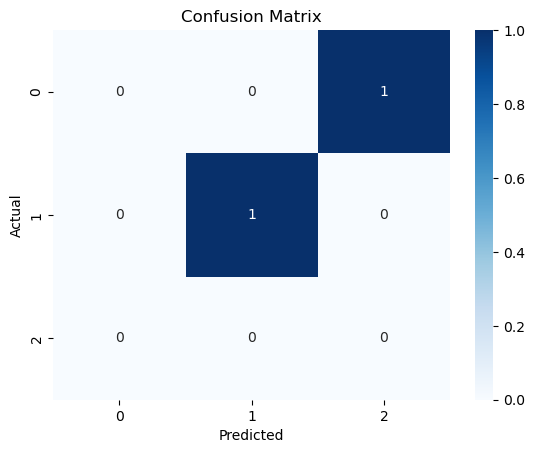

In [49]:
from sklearn.model_selection import GridSearchCV

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Check if grid search completed successfully
if hasattr(grid_search, 'best_estimator_') and grid_search.best_estimator_ is not None:
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
else:
    print("GridSearchCV did not find a best estimator. Please check the grid search process.")
    print("GridSearchCV Results:", grid_search.cv_results_)


In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the dataset
print(data.info())

# Select relevant features for clustering (use 'Age', 'Salary', 'Gender', and 'Severity' columns)
columns_to_use = ['Age', 'Salary', 'Gender', 'Severity']
selected_data = data[columns_to_use]

# Handle missing values
selected_data.dropna(inplace=True)

# Encode categorical variables (e.g., Gender, Severity)
label_encoder = LabelEncoder()
selected_data['Gender'] = label_encoder.fit_transform(selected_data['Gender'])
selected_data['Severity'] = label_encoder.fit_transform(selected_data['Severity'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       5 non-null      int64  
 1   Salary    5 non-null      float64
 2   Gender    5 non-null      object 
 3   Severity  5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes
None


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


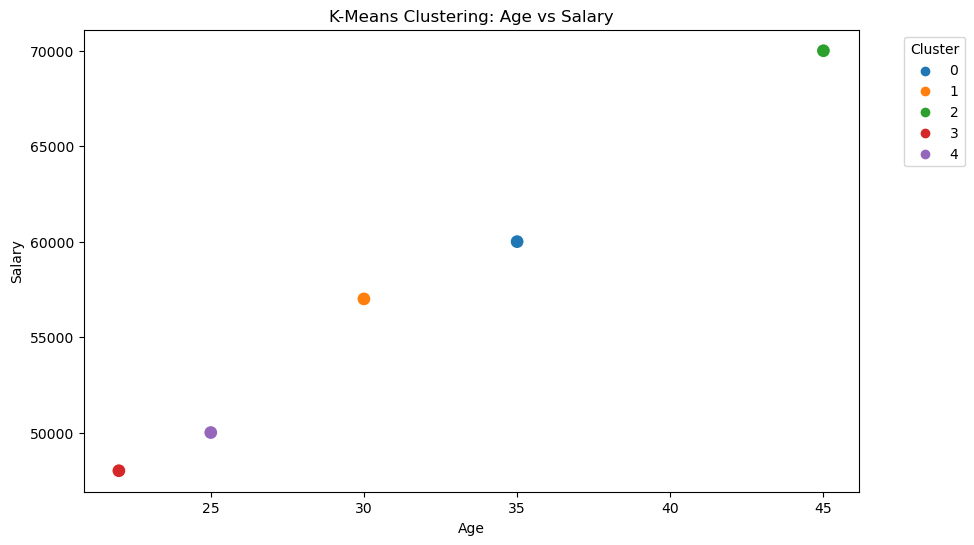

In [52]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
selected_data['KMeans_Cluster'] = kmeans_labels

# Visualize K-Means Clusters using Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=selected_data['Age'],
    y=selected_data['Salary'],
    hue=selected_data['KMeans_Cluster'],
    palette='tab10',
    s=100
)
plt.title('K-Means Clustering: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


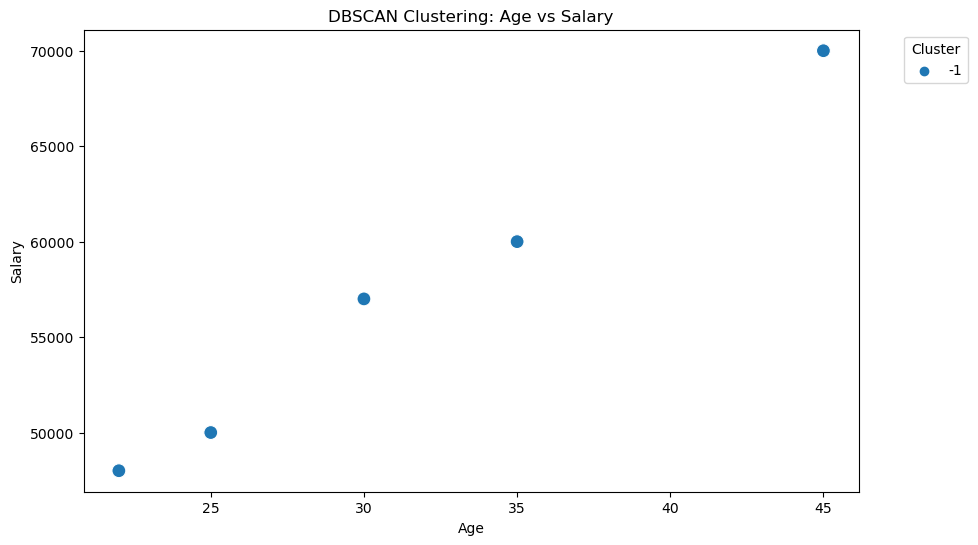

In [53]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)
selected_data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN Clusters using Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=selected_data['Age'],
    y=selected_data['Salary'],
    hue=selected_data['DBSCAN_Cluster'],
    palette='tab10',
    s=100
)
plt.title('DBSCAN Clustering: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


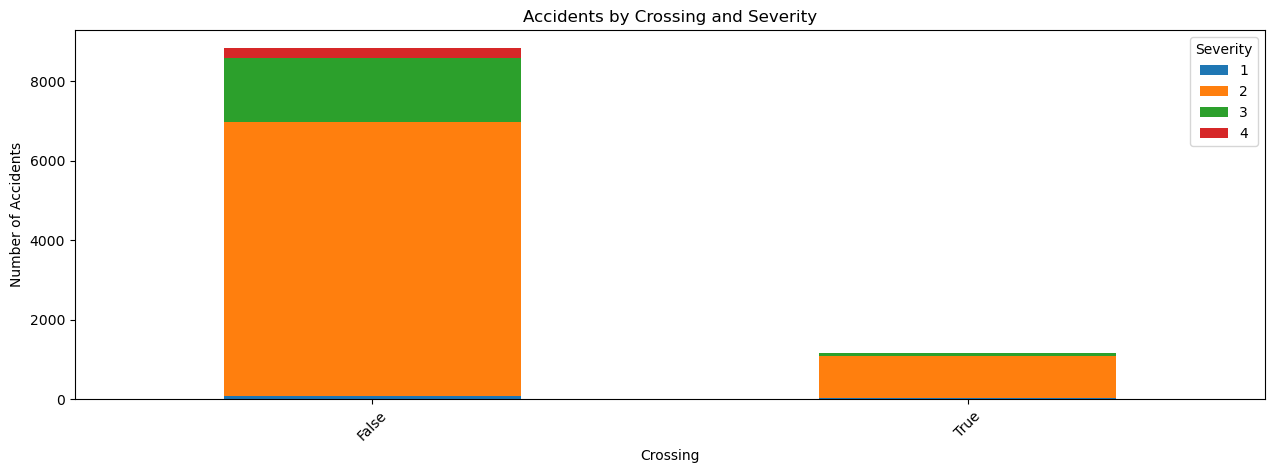

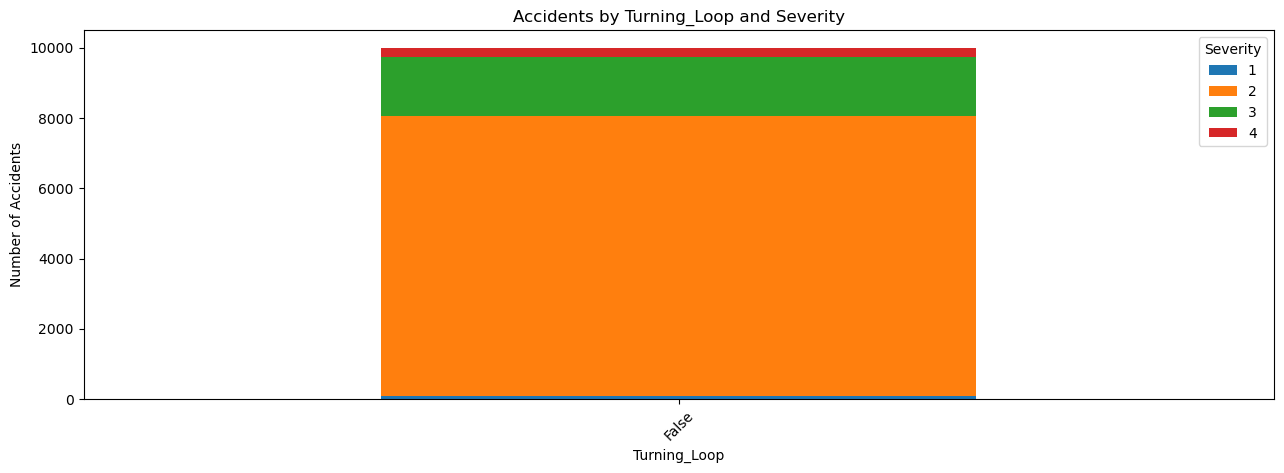

In [57]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load your data
data_filename = './us-accidents/US_Accidents_March23.csv'
data = pd.read_csv(data_filename).sample(n=10000)

# Create the main window
root = tk.Tk()
root.title("US Accidents Data")

# Create a treeview to display the DataFrame
tree = ttk.Treeview(root, columns=list(data.columns), show='headings')
tree.grid(row=0, column=0, sticky='nsew')

# Define the headings
for col in data.columns:
    tree.heading(col, text=col)
    tree.column(col, anchor='center')

# Insert data into the treeview
for index, row in data.iterrows():
    tree.insert("", "end", values=list(row))

# Add a scrollbar
scrollbar = ttk.Scrollbar(root, orient="vertical", command=tree.yview)
tree.configure(yscroll=scrollbar.set)
scrollbar.grid(row=0, column=1, sticky='ns')

# Create a frame for the plot
plot_frame = tk.Frame(root)
plot_frame.grid(row=1, column=0, columnspan=2, sticky='nsew')

# Configure row and column weights for resizing
root.grid_rowconfigure(0, weight=1)
root.grid_rowconfigure(1, weight=1)
root.grid_columnconfigure(0, weight=1)

# Function to plot the graph
def plot_comparison():
    condition_col = condition_column.get()
    severity_col = severity_column.get()
    
    if condition_col and severity_col:
        # Group by the selected condition and severity
        comparison_data = data.groupby([condition_col, severity_col]).size().unstack(fill_value=0)

        # Create a figure for the plot
        fig, ax = plt.subplots(figsize=(10, 5))
        comparison_data.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Accidents by {condition_col} and {severity_col}')
        ax.set_xlabel(condition_col)
        ax.set_ylabel('Number of Accidents')
        ax.set_xticks(range(len(comparison_data.index)))
        ax.set_xticklabels(comparison_data.index, rotation=45)
        ax.legend(title=severity_col)

        # Clear previous plots if any
        for widget in plot_frame.winfo_children():
            widget.destroy()

        # Embed the plot in the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side='top', fill='both', expand=True)

# Function to plot road conditions
def plot_road_conditions():
    road_condition_col = 'Road_Condition'
    severity_col = severity_column.get()
    
    if severity_col:
        # Group by road condition and severity
        road_condition_data = data.groupby([road_condition_col, severity_col]).size().unstack(fill_value=0)

        # Create a figure for the plot
        fig, ax = plt.subplots(figsize=(10, 5))
        road_condition_data.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Accidents by {road_condition_col} and {severity_col}')
        ax.set_xlabel(road_condition_col)
        ax.set_ylabel('Number of Accidents')
        ax.set_xticks(range(len(road_condition_data.index)))
        ax.set_xticklabels(road_condition_data.index, rotation=45)
        ax.legend(title=severity_col)

        # Clear previous plots if any
        for widget in plot_frame.winfo_children():
            widget.destroy()

        # Embed the plot in the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side='top', fill='both', expand=True)

# Create dropdowns for selecting columns
condition_column = tk.StringVar()
severity_column = tk.StringVar()

condition_options = ['Weather_Condition', 'Precipitation(in)' , 'Visibility(mi)', 'Humidity(%)', 'Bump', 'Crossing', 'Turning_Loop']
severity_options = ['Severity']


condition_dropdown = ttk.Combobox(root, textvariable=condition_column, values=condition_options, width=30)
condition_dropdown.set("Select Condition Column")
condition_dropdown.grid(row=2, column=0, pady=5)

severity_dropdown = ttk.Combobox(root, textvariable=severity_column, values=severity_options, width=30)
severity_dropdown.set("Select Severity Column")
severity_dropdown.grid(row=3, column=0, pady=5)

# Button to plot the comparison graph
compare_button = tk.Button(root, text="Compare Conditions", command=plot_comparison, bg='lightblue', width=20)
compare_button.grid(row=4, column=0, pady=10)


# Start the GUI event loop
root.mainloop()